In [1]:
#Import all the necessary packages
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
from sklearn.datasets import load_iris

In [3]:
# Load the Iris dataset
iris = load_iris()

# Print the description of the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

This code will import the Iris dataset and print out its description, feature names, target names, data shape, first five rows of data, and target values.

In [4]:
# Access the feature names
print("Feature names:", iris.feature_names)

# Access the target names
print("Target names:", iris.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
# Access the data
print("Data shape:", iris.data.shape)
print("First five rows of data:\n", iris.data[:5])

Data shape: (150, 4)
First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
# Access the target (labels)
print("Target shape:", iris.target.shape)
print("Target values:", iris.target)

Target shape: (150,)
Target values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Split dataset into features (x) and labels (y)

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = iris.data  # Features
y = iris.target  # Target

# Optionally, we can split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Print the shapes of the datasets
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)

Shape of features (X): (150, 4)
Shape of target (y): (150,)
Shape of training features (X_train): (120, 4)
Shape of testing features (X_test): (30, 4)
Shape of training target (y_train): (120,)
Shape of testing target (y_test): (30,)


'X' contains the features (input variables) of the Iris dataset.

'y' contains the target variable (class labels).

* Train_test_split function is used to split the dataset into training and testing sets, with 80% of the data used for training and 20% for testing. Adjust the test_size parameter as needed.
* Random_state parameter is set for reproducibility, ensuring that the split is the same every time you run the code.

#### Normalize the features

In [9]:
from sklearn.preprocessing import StandardScaler

# Method 1: Standardization (scaling to have mean=0 and variance=1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In the code above, 'StandardScaler' from 'sklearn.preprocessing' is used for standardization.

#### Encode the class labels into binary format

In [10]:
from sklearn.preprocessing import LabelBinarizer

# Encode the class labels into binary format
label_binarizer = LabelBinarizer()
y_binary = label_binarizer.fit_transform(y)

# Print the original class labels and the corresponding binary representation
print("Original Class Labels:")
print(y[:5])  # Print the first 5 original class labels

print("\nBinary Representation of Class Labels:")
print(y_binary[:5])  # Print the binary representation of first five class labels

Original Class Labels:
[0 0 0 0 0]

Binary Representation of Class Labels:
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


'LabelBinarizer' is used to convert the class labels into binary format.

The 'fit_transform()' method is used to both fit the binarizer to the class labels and transform them into binary format simultaneously.

'y_binary' now contains the binary representation of the class labels. Each row represents a sample, and each column represents a class, with a value of 1 indicating the presence of that class and 0 indicating absence.

#### Design the sample Neural Network

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the architecture of the neural network
model = Sequential([
    Dense(64, input_shape=(4,), activation='relu'),  # Input layer with 4 features
    Dense(32, activation='relu'),                    # Hidden layer with 32 neurons and ReLU activation
    Dense(1, activation='sigmoid')                   # Output layer with 3 neurons for classification
])

The neural network is created using the Sequential model from Keras, which allows you to build models layer by layer.


We add layers to the model using the Dense layer, which represents fully connected layers.

The first layer (Dense(64, input_shape=(4,), activation='relu')) has 64 neurons, expects input with 4 features (assuming you are working with the Iris dataset), and uses the ReLU activation function.


The second layer (Dense(32, activation='relu')) has 32 neurons and also uses the ReLU activation function.



The output layer (Dense(1, activation='sigmoid')) has 1 neuron corresponding to one class in the Iris dataset, and it uses the sigmoid activation function for binary classification.


In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adam optimizer with learning rate 0.001
              loss='binary_crossentropy',      # Binary cross-entropy loss for binary classification
              metrics=['accuracy'])                  # Monitor accuracy during training

The model is compiled using the Adam optimizer with a learning rate of 0.001, binary cross-entropy loss function for binary classification, and accuracy as the metric to monitor during training.

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50


14/14 [==============================] - 2s 34ms/step - loss: 0.6721 - accuracy: 0.4167 - val_loss: -0.1177 - val_accuracy: 0.4167
Epoch 2/50
14/14 [==============================] - 0s 14ms/step - loss: -0.1756 - accuracy: 0.3333 - val_loss: -0.8681 - val_accuracy: 0.4167
Epoch 3/50
14/14 [==============================] - 0s 12ms/step - loss: -0.6043 - accuracy: 0.3333 - val_loss: -1.4650 - val_accuracy: 0.4167
Epoch 4/50
14/14 [==============================] - 0s 12ms/step - loss: -1.0467 - accuracy: 0.3333 - val_loss: -2.0310 - val_accuracy: 0.4167
Epoch 5/50
14/14 [==============================] - 0s 12ms/step - loss: -1.5320 - accuracy: 0.3333 - val_loss: -2.6897 - val_accuracy: 0.4167
Epoch 6/50
14/14 [==============================] - 0s 13ms/step - loss: -2.1232 - accuracy: 0.3333 - val_loss: -3.5347 - val_accuracy: 0.4167
Epoch 7/50
14/14 [==============================] - 0s 12ms/step - loss: -2.8537 - accuracy: 0.3333 - val_loss: -4.6637 - val_accuracy: 0.416

* We train the model on the training set for 50 epochs with a batch size of 8 and a validation split of 0.1.
* We evaluate the model's performance on the test set and print the test loss and accuracy.

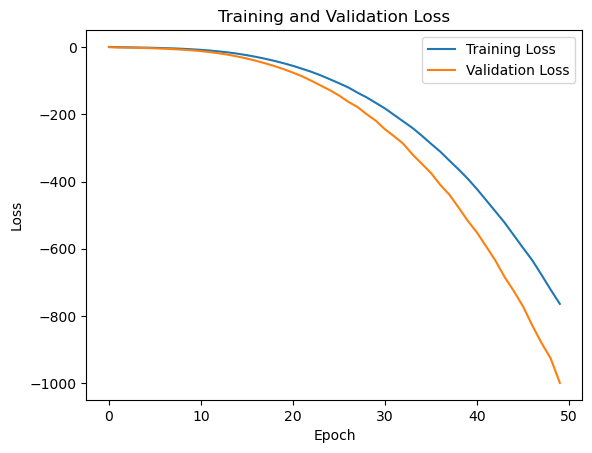

In [14]:
import matplotlib.pyplot as plt

# Visualize the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

* We train the model and store the training history in the variable history.
* We use Matplotlib to plot the training loss (loss) and validation loss (val_loss) across epochs.
* The x-axis represents the number of epochs, and the y-axis represents the loss value.
* The plot helps visualize how the loss decreases during training and whether there's any overfitting indicated by a significant difference between training and validation loss.

In [15]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Add BatchNormalization layer
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),  # Add BatchNormalization layer
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add BatchNormalization layer
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),  # Add BatchNormalization layer
    Dropout(0.3),
    Dense(1)
])
#Network summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               1280      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [16]:
# Compile the model
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping and batch normalization
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Accuracy Test Data: {accuracy}")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
3/3 [==============================] - 5s 451ms/step - loss: 9.6239 - accuracy: 0.3333 - val_loss: 9.3023 - val_accuracy: 0.2083
Epoch 2/100
3/3 [==============================] - 0s 63ms/step - loss: 4.0003 - accuracy: 0.4375 - val_loss: 2.4961 - val_accuracy: 0.2083
Epoch 3/100
3/3 [==============================] - 0s 69ms/step - loss: 4.5780 - accuracy: 0.4792 - val_loss: 1.8059 - val_accuracy: 0.2083
Epoch 4/100
3/3 [==============================] - 0s 72ms/step - loss: 1.4528 - accuracy: 0.5000 - val_loss: 1.4721 - val_accuracy: 0.2083
Epoch 5/100
3/3 [==============================] - 0s 73ms/step - loss: 1.5697 - accuracy: 0.6042 - val_loss: 1.3276 - val_accuracy: 0.2083
Epoch 6/100
3/3 [==============================] - 0s 59ms/step - loss: 0.8854 - accuracy: 0.5417 - val_loss: 1.3121 - val_accuracy: 0.2083
Epoch 7/100
3/3 [==============================] - 0s 68ms/step - loss: 1.4158 - accuracy: 0.5833 - val_loss: 1.3392 - val_accuracy: 0.2083
Epoch 8/100
3/3 [=

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping and batch normalization
history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Accuracy Test Data: {mae}")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: -4.1265 - accuracy: 0.7188 - val_loss: -7.6246 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 130ms/step - loss: -4.1235 - accuracy: 0.6979 - val_loss: -7.6246 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 119ms/step - loss: -3.8155 - accuracy: 0.6979 - val_loss: -7.6246 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 124ms/step - loss: -3.8816 - accuracy: 0.7188 - val_loss: -7.6246 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 78ms/step - loss: -4.1599 - accuracy: 0.7188 - val_loss: -7.6246 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 78ms/step - loss: -3.7869 - accuracy: 0.7083 - val_loss: -7.6246 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 94ms/step - loss: -3.5079 - accuracy: 0.7188 - val_loss: -7.6246 - val_accuracy: 0.5000
Epoch 8/50
1

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions using threshold 0.5

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Change average to 'binary'
recall = recall_score(y_test, y_pred, average='macro')        # Change average to 'binary'
f1 = f1_score(y_test, y_pred, average='macro')            # Change average to 'binary'

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

1/1 [==============================] - 0s 435ms/step
Accuracy: 0.6333333333333333
Precision: 0.48333333333333334
Recall: 0.6666666666666666
F1 Score: 0.5402298850574713


In [19]:
# Plot decision boundary
#x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
#y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
#xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     #np.arange(y_min, y_max, 0.01))

#Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5
#Z = Z.reshape(xx.shape)

#plt.contourf(xx, yy, Z, alpha=0.3)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
#plt.xlabel('Sepal length')
##plt.ylabel('Sepal width')
#plt.title('Decision Boundary')
#plt.show()

1/1 [==============================] - 0s 47ms/step


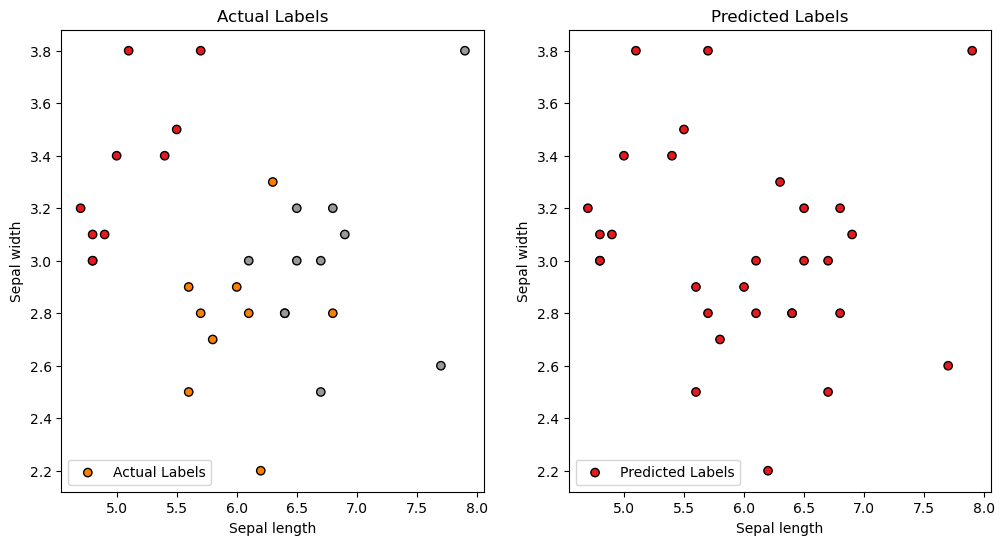

In [20]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Choose the class with the highest probability as the predicted class

# Visualize some predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor='k', label='Actual Labels')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Actual Labels')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Set1, edgecolor='k', label='Predicted Labels')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Predicted Labels')
plt.legend()

plt.show()
